# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [17]:
## Area de importaciones. ADUANA
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [18]:
# Carga de datos
fergie = Image.open('./bep.jpg')
southpark = Image.open('./southpark.jpg')
rocky = Image.open('./rocky.png')
mastermiyagi = Image.open('./miyagi.jpg')

## Regression Model Evaluation

In [22]:
#%%
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

data.info() #Nada que limpiar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [23]:
#%%
X1 = data.copy()
try:
    X1 = data.drop('MEDV', axis=1) #Quitamos MEDV porque va a ser nuesta variable "y"
except:
    print('Ya la quitaste')


In [24]:
y1 = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2) #Separamos los datos para entrenamiento.

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

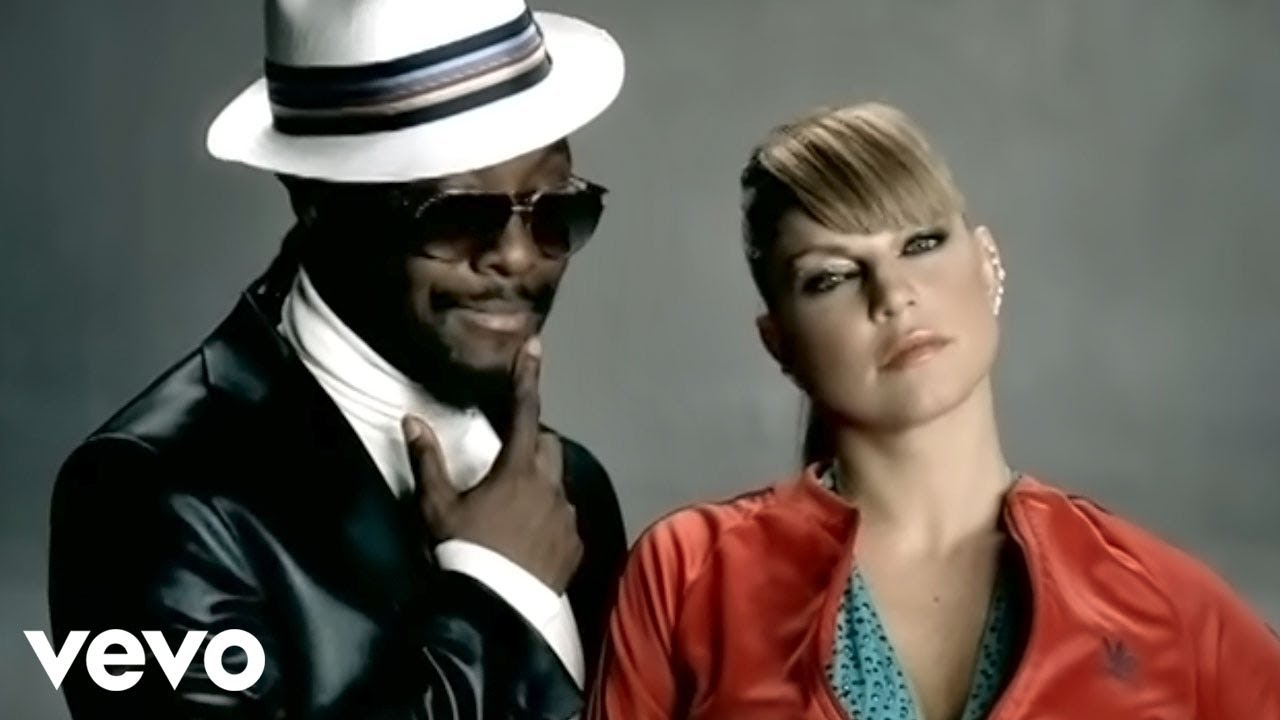

Intercept: 38.30438853224433
Coeficientes: [-1.13835918e-01  5.46225139e-02 -4.21004793e-03  2.19888922e+00
 -1.66447665e+01  3.56173689e+00  3.18515338e-03 -1.58077617e+00
  3.39945695e-01 -1.34058149e-02 -9.89705149e-01  1.06454883e-02
 -5.28593097e-01]


In [25]:
#%%

## Instanciamos un modelo de Regresion Lineal.
linearReg_model= LinearRegression() 

display(fergie)
#What you gonna do, with all that 'train', all that 'train', inside that 'fit'?
linearReg_model.fit(X_train, y_train) 
y_pred = linearReg_model.predict(X_test)

print(f'Intercept: {linearReg_model.intercept_}')
print(f'Coeficientes: {linearReg_model.coef_}')

In [27]:
y_pred_train = linearReg_model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [28]:
#%%

# "No entrenamos para tener piedad, la piedad es para los débiles, aquí, en la iniciativa privada, la competencia te enfrenta, es tu enemigo. El enemigo no merece piedad. " Lic. John -Godín- Kreese

print('R-squared Test:',r2_score(y_test, y_pred))
print('R-squared Train:',r2_score(y_train, y_pred_train))

R-squared Test: 0.7640170249959621
R-squared Train: 0.7331803690176351


## 4. Calculate and print mean squared error for both the training and the testing set.

In [29]:
#%%
print('Mean Squared Error Test: ', mean_squared_error(y_test, y_pred))
print('Mean Squared Error Train:', mean_squared_error(y_train, y_pred_train))

Mean Squared Error Test:  18.018209233987946
Mean Squared Error Train: 23.000178620343092


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [30]:
#%%
print('Mean absolute error Test:',mean_absolute_error(y_test, y_pred))
print('Mean absolute error Train:',mean_absolute_error(y_train, y_pred_train))

Mean absolute error Test: 3.1654643288334943
Mean absolute error Train: 3.341890940481896


## Classification Model Evaluation

In [31]:
#%%
from sklearn.datasets import load_iris

data1 = load_iris()

X = pd.DataFrame(data1["data"], columns=data1["feature_names"])
y = pd.DataFrame(data1["target"], columns=["class"])

data1 = pd.concat([X, y], axis=1)
data1.info() #Todo bien.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 6. Split this data set into training (80%) and testing (20%) sets.


The `class` field represents the type of flower and is the target variable that we will want to predict.

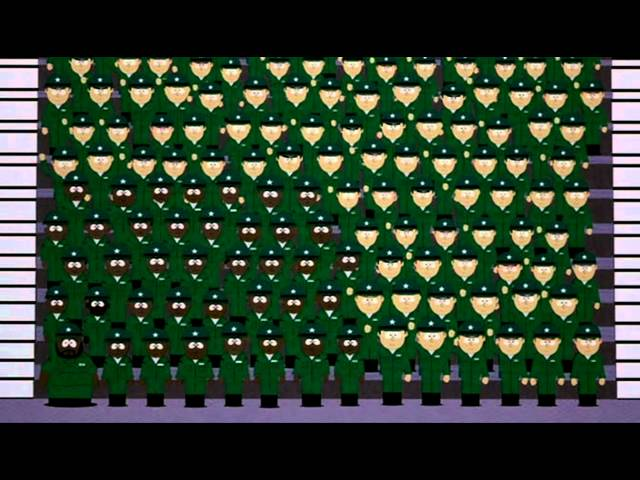

In [32]:
#%%
display(southpark)

X2 = data1.copy()

## Operation HUMAN SHIELD ##
X2 = data1.drop('class', axis=1)
y2 = data1['class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

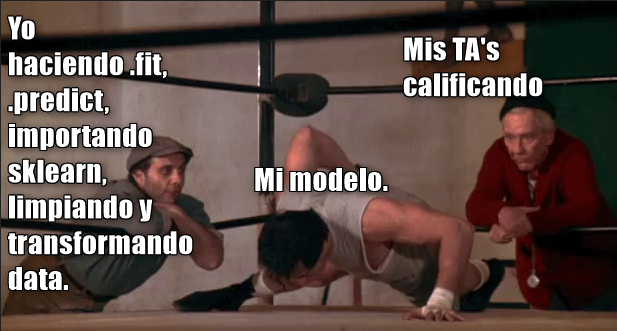

In [33]:
#%%
display(rocky)
logReg_model2= LogisticRegression() 
logReg_model2.fit(X_train2, y_train2)

y_pred2 = logReg_model2.predict(X_test2)

In [34]:
#%% 
y_pred_train2 = logReg_model2.predict(X_train2)

## 8. Calculate and print the accuracy score for both the training and the testing set.

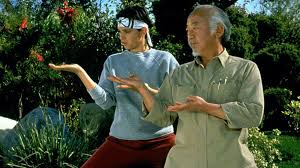

Accuracy score Test 0.9
Accuracy score Train 0.975


In [35]:
#%%
display(mastermiyagi)
# “Veo que no hay mal modelo, solo mal analista. Lo que dice analista, modelo hace.” 
# – Data Scientist Miyagi.


print('Accuracy score Test',accuracy_score(y_test2, y_pred2))
print('Accuracy score Train',accuracy_score(y_train2, y_pred_train2))

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [36]:
#%%
print('Balanced Accuracy Score Test:',balanced_accuracy_score(y_test2, y_pred2))
print('Balanced Accuracy Score Train:',balanced_accuracy_score(y_train2, y_pred_train2))

Balanced Accuracy Score Test: 0.9074074074074074
Balanced Accuracy Score Train: 0.9736842105263158


## 10. Calculate and print the precision score for both the training and the testing set.

In [37]:
#%%
print('Presicion Score Test:',precision_score(y_test2, y_pred2, average='weighted'))
print('Presicion Score Train:',precision_score(y_train2, y_pred_train2, average='weighted'))

Presicion Score Test: 0.9036363636363636
Presicion Score Train: 0.9767045454545454


## 11. Calculate and print the recall score for both the training and the testing set.

In [38]:
#%%
print('Recall Score Test:',recall_score(y_test2, y_pred2, average='weighted'))
print('Recall Score Train:',recall_score(y_train2, y_pred_train2, average='weighted'))

Recall Score Test: 0.9
Recall Score Train: 0.975


## 12. Calculate and print the F1 score for both the training and the testing set.

In [39]:
#%%
print('F1_score Test:',f1_score(y_test2, y_pred2, average='weighted'))
print('F1_score Train:',f1_score(y_train2, y_pred_train2, average='weighted'))

F1_score Test: 0.9004576659038901
F1_score Train: 0.9749274778404512


## 13. Generate confusion matrices for both the training and the testing set.

In [40]:
confusion_matrix(y_test2, y_pred2)

array([[ 9,  0,  0],
       [ 0, 10,  2],
       [ 0,  1,  8]], dtype=int64)

In [41]:
confusion_matrix(y_train2, y_pred_train2)

array([[41,  0,  0],
       [ 0, 35,  3],
       [ 0,  0, 41]], dtype=int64)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.